
Overall Statistics:-


count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Score, dtype: float64

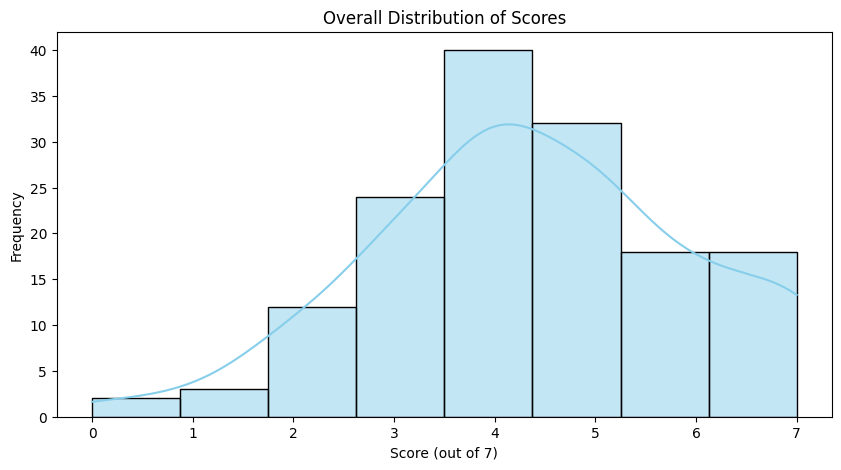

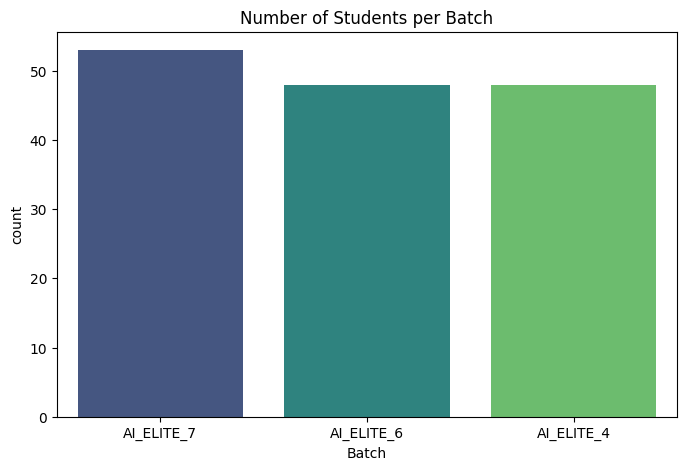


Statistics by Batch:-


,count,mean,std,min,25%,50%,75%,max
Batch,,,,,,,,
AI_ELITE_4,48.0,3.791667,1.443376,0.0,3.0,4.0,4.25,7.0
AI_ELITE_6,48.0,4.229167,1.640441,0.0,3.0,4.0,5.00,7.0
AI_ELITE_7,53.0,5.056604,1.446682,2.0,4.0,5.0,6.00,7.0


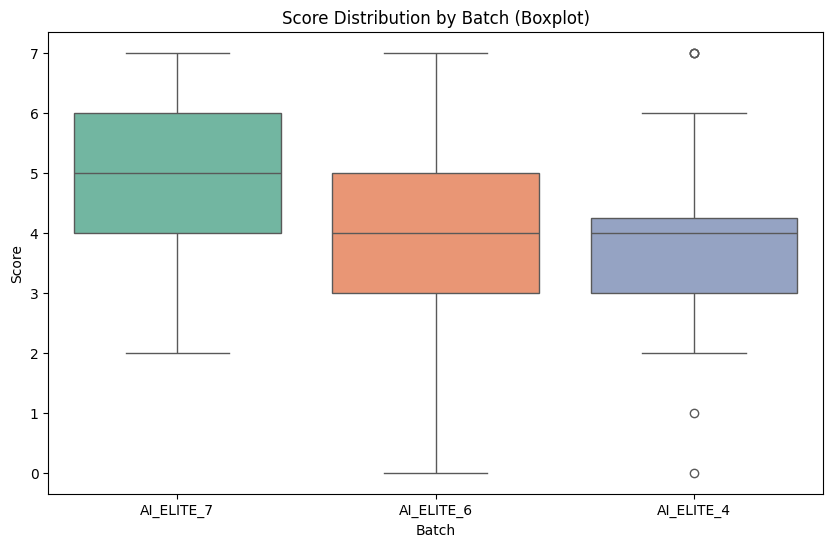

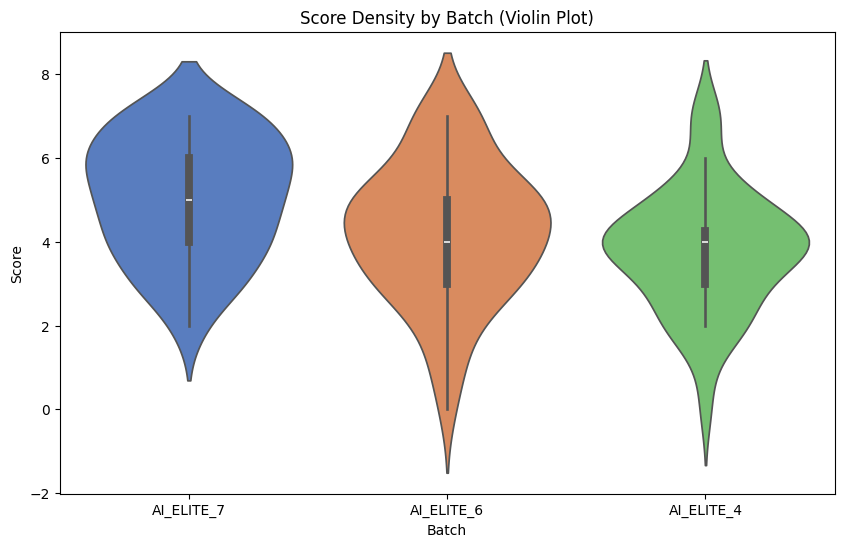

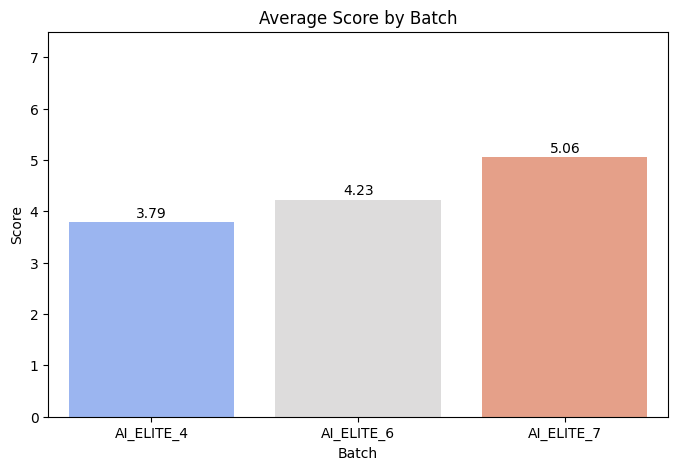


Performance Percentages per Batch:-


Performance,High (6-7),Low (0-2),Medium (3-5)
Batch,,,
AI_ELITE_4,8.333333,18.750000,72.916667
AI_ELITE_6,18.750000,12.500000,68.750000
AI_ELITE_7,43.396226,3.773585,52.830189


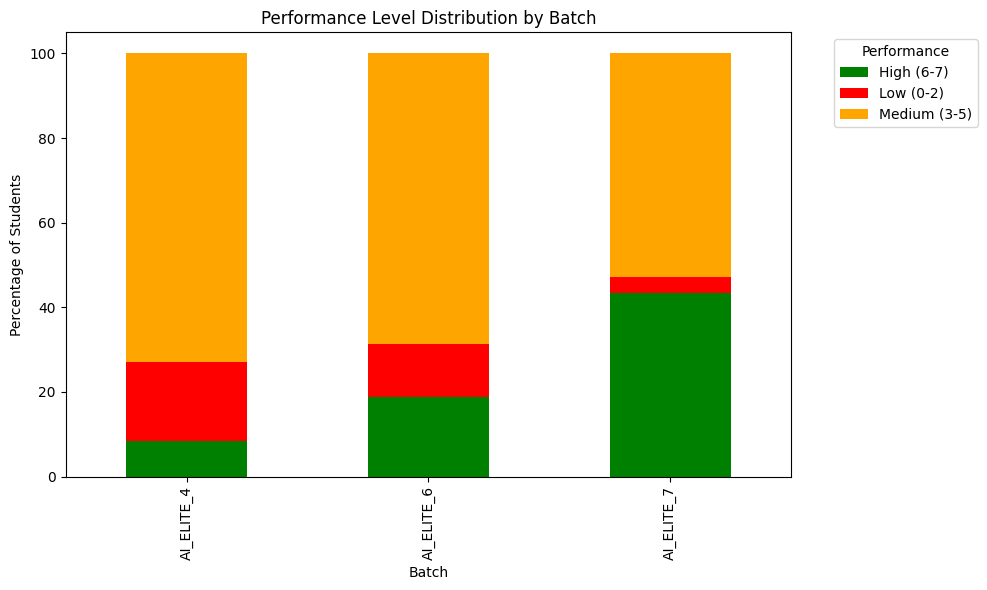

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data
df = pd.read_csv('scores_data.csv')

# Data Cleaning & Preprocessing
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Clean the 'Score' column (convert "6 / 7" -> 6)
df['Score'] = df['Score'].str.replace(' / 7', '', regex=False)
df['Score'] = pd.to_numeric(df['Score'])

# Univariate Analysis
print("\nOverall Statistics:-")
display(df['Score'].describe())

# Histogram of all scores
plt.figure(figsize=(10, 5))
sns.histplot(df['Score'], kde=True, bins=8, color='skyblue')
plt.title('Overall Distribution of Scores')
plt.xlabel('Score (out of 7)')
plt.ylabel('Frequency')
plt.show()

# Count of students per batch
plt.figure(figsize=(8, 5))
sns.countplot(x='Batch', data=df, palette='viridis', hue='Batch', legend=False)
plt.title('Number of Students per Batch')
plt.show()

# Bivariate Analysis
print("\nStatistics by Batch:-")
display(df.groupby('Batch')['Score'].describe())

# Boxplot to compare distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Batch', y='Score', data=df, palette='Set2', hue='Batch', legend=False)
plt.title('Score Distribution by Batch (Boxplot)')
plt.show()

# Violin plot for density visualization
plt.figure(figsize=(10, 6))
sns.violinplot(x='Batch', y='Score', data=df, palette='muted', hue='Batch', legend=False)
plt.title('Score Density by Batch (Violin Plot)')
plt.show()

# Bar plot for Average Scores
mean_scores = df.groupby('Batch')['Score'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Batch', y='Score', data=mean_scores, palette='coolwarm', hue='Batch', legend=False)
plt.title('Average Score by Batch')
plt.ylim(0, 7.5)
for index, row in mean_scores.iterrows():
    plt.text(index, row.Score + 0.1, round(row.Score, 2), color='black', ha="center")
plt.show()

# Multivariate / Categorical Analysis
# Create Performance Buckets
def get_performance_bucket(score):
    if score >= 6:
        return 'High (6-7)'
    elif score >= 3:
        return 'Medium (3-5)'
    else:
        return 'Low (0-2)'

df['Performance'] = df['Score'].apply(get_performance_bucket)

# Stacked Bar Chart of Performance vs Batch
performance_pct = pd.crosstab(df['Batch'], df['Performance'], normalize='index') * 100

print("\nPerformance Percentages per Batch:-")
display(performance_pct)

performance_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red', 'orange'])
plt.title('Performance Level Distribution by Batch')
plt.ylabel('Percentage of Students')
plt.legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Data Cleaning & Preprocessing
Before starting the analysis, I inspected the data and found a few minor issues that needed cleaning:

- **Column Names:** The column names contained trailing spaces (e.g., `'Batch '`, `'User_ID '`, `' Score '`). These were stripped to make them easier to access.

- **Score Format:** The score was stored as a string in the format `"6 / 7"`. I processed this column to remove the `"/ 7"` and converted the remaining number into a numeric data type (integer/float) for analysis.

---

# Exploratory Data Analysis (EDA)
## Univariate Analysis (Overall Performance):
I looked at the distribution of scores across all students regardless of their batch.

- **Statistics:**

    - **Mean Score:** 4.38

    - **Median Score:** 4.00

    - **Max Score:** 7.00

    - **Min Score:** 0.00

- **Observation:** The scores are somewhat normally distributed but slightly skewed towards higher scores (negative skew), with the majority of students scoring between 3 and 5.

## Bivariate Analysis (Batch vs. Score):
I compared the performance across the three different batches: **AI_ELITE_4**, **AI_ELITE_6**, and **AI_ELITE_7**.

| Batch       | Students | Mean Score | Median | Max | Min |
|-------------|----------:|-----------:|--------:|----:|----:|
| AI_ELITE_4  | 48        | 3.79       | 4.0     | 7   | 0   |
| AI_ELITE_6  | 48        | 4.23       | 4.0     | 7   | 0   |
| AI_ELITE_7  | 53        | 5.06       | 5.0     | 7   | 2   |

- **Observation:** **AI_ELITE_7** is clearly the top-performing batch with the highest average score (5.06) and the highest minimum score (2), meaning no student in this batch scored a 0 or 1. **AI_ELITE_4** appears to be the lowest performing batch.

## Multivariate Analysis (Performance Levels by Batch):
To get a deeper understanding, I categorized students into performance buckets: **Low (0-2)**, **Medium (3-5)**, and **High (6-7)**.

- **AI_ELITE_7:** ~43% of students are High Performers. Only ~4% are Low Performers.

- **AI_ELITE_6:** ~19% are High Performers. ~13% are Low Performers.

- **AI_ELITE_4:** Only ~8% are High Performers. ~19% are Low Performers.

---

# Key Insights & Conclusion
- **Batch Hierarchy:** There is a clear progression in performance. `AI_ELITE_7 > AI_ELITE_6 > AI_ELITE_4`. The latest batch (Batch 7) has significantly outperformed the previous ones.

- **Consistency:** `AI_ELITE_7` is not just better on average; it is more consistent. The score range is tighter (2 to 7) compared to the other batches (0 to 7), indicating fewer students are being "left behind" in Batch 7.

- **Struggling Students:** `AI_ELITE_4` has the highest proportion of "Low" performers (almost 1 in 5 students scoring 0-2). This batch might require remedial sessions or a review of the curriculum used during that period.

---